In [1]:
# All import insertions
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import isnull
from sklearn import preprocessing
import os    # For file paths
import re    # Regular Expressions

import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

In [2]:
# Open the file
df = pd.read_csv("../data/processed/data_cleaned.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis',
       'Orientation', 'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season',
       'YardLine', 'Quarter', 'GameClock', 'PossessionTeam', 'Down',
       'Distance', 'FieldPosition', 'HomeScoreBeforePlay',
       'VisitorScoreBeforePlay', 'NflIdRusher', 'OffenseFormation',
       'OffensePersonnel', 'DefendersInTheBox', 'DefensePersonnel',
       'PlayDirection', 'TimeHandoff', 'TimeSnap', 'Yards', 'PlayerHeight',
       'PlayerWeight', 'PlayerBirthDate', 'PlayerCollegeName', 'Position',
       'HomeTeamAbbr', 'VisitorTeamAbbr', 'Week', 'Stadium', 'Location',
       'StadiumType', 'Turf', 'GameWeather', 'Temperature', 'Humidity',
       'WindSpeed', 'WindDirection', 'isFirstDown', 'isHomeTeam',
       'FieldPositionCode', 'HomeTeamAbbrCode', 'VisitorTeamAbbrCode',
       'PossessionTeamAbbrCode', 'YardsToTouchdown', 'TimeSnapDiff',
       'PlayerHeightFt', 'PlayerHeightIn', 'PlayerHeightInches'],
      dtype='

In [4]:
df.count()

Unnamed: 0            31007
GameId                31007
PlayId                31007
Team                  31007
X                     31007
                      ...  
YardsToTouchdown      31007
TimeSnapDiff          31007
PlayerHeightFt        31007
PlayerHeightIn        31007
PlayerHeightInches    31007
Length: 61, dtype: int64

## Yards and isFirstdown Variables (Predictor variable)

In [5]:
df['Yards'].value_counts().sort_index()

-15    1
-14    1
-12    4
-11    3
-10    5
      ..
 90    2
 91    1
 92    1
 97    1
 99    1
Name: Yards, Length: 102, dtype: int64

In [6]:
df['isFirstDown'].value_counts()

0    24415
1     6592
Name: isFirstDown, dtype: int64

## Game Id count
31007 plays among 688 games

In [7]:
df.isna().sum()

Unnamed: 0            0
GameId                0
PlayId                0
Team                  0
X                     0
                     ..
YardsToTouchdown      0
TimeSnapDiff          0
PlayerHeightFt        0
PlayerHeightIn        0
PlayerHeightInches    0
Length: 61, dtype: int64

In [8]:
df['GameId'].nunique()

688

## PlayID count
Unique number to identify

In [9]:
df['PlayId'].isna().sum()

0

In [10]:
df['PlayId'].nunique()

31007

## Team variables
Whether the team that has posession of the ball has the home field advantage, or are the visitor team.

In [11]:
df['Team'].count()

31007

In [12]:
df['Team'].value_counts()

home    15617
away    15390
Name: Team, dtype: int64

In [13]:
df['isHomeTeam'].value_counts()

1    15617
0    15390
Name: isHomeTeam, dtype: int64

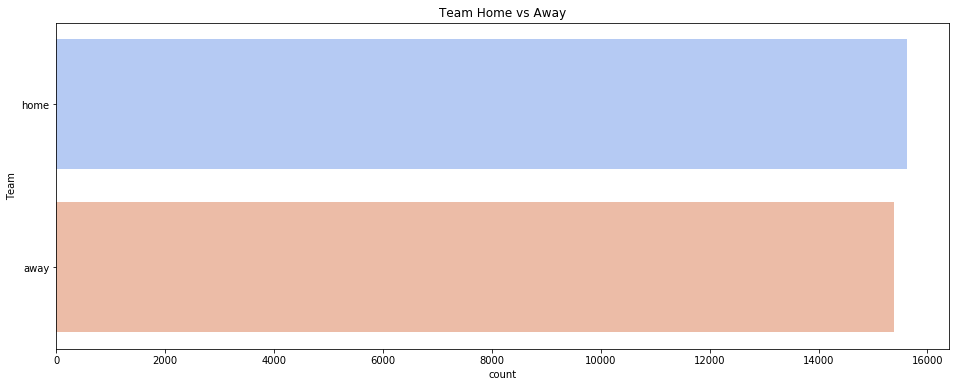

In [14]:
plt.figure(figsize=(16, 6))
snsj=sns.countplot(y=df['Team'] ,palette="coolwarm")
plt.title('Team Home vs Away')
plt.savefig("../reports/figures/data_team.png")

## Season variable
A breakdown of all the season years

In [15]:
df['Season'].value_counts()

2017    11900
2018    11271
2019     7836
Name: Season, dtype: int64

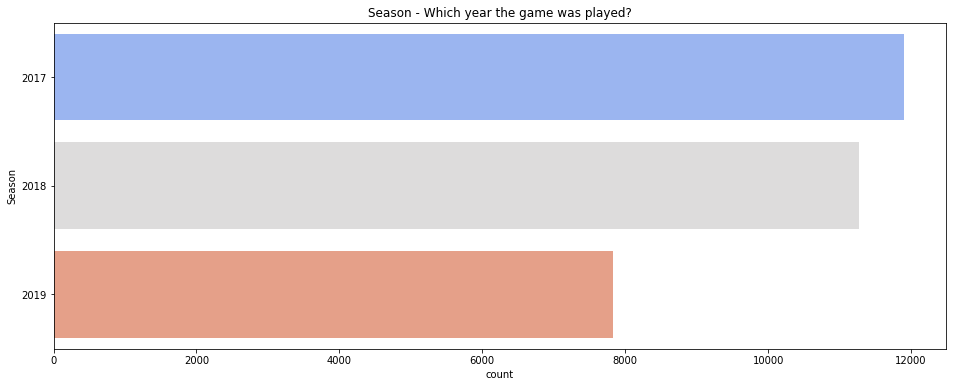

In [16]:
plt.figure(figsize=(16, 6))
snsj=sns.countplot(y=df['Season'] ,palette="coolwarm")
plt.title('Season - Which year the game was played?')
plt.savefig("../reports/figures/data_season.png")

## Yardline variables
The yard positions

In [28]:
df['YardLine'].value_counts().sort_index()

1      638
2      336
3      276
4      298
5      315
6      305
7      322
8      386
9      353
10     442
11     379
12     420
13     423
14     443
15     550
16     427
17     439
18     469
19     535
20     766
21     555
22     588
23     530
24     602
25    2587
26     678
27     625
28     650
29     680
30     809
31     741
32     675
33     701
34     869
35     775
36     743
37     754
38     690
39     712
40     863
41     731
42     670
43     682
44     648
45     774
46     730
47     666
48     667
49     699
50     391
Name: YardLine, dtype: int64

In [29]:
df['YardsToTouchdown'].value_counts().sort_index()

1     562
2     239
3     199
4     204
5     209
     ... 
95    106
96     94
97     77
98     97
99     76
Name: YardsToTouchdown, Length: 99, dtype: int64

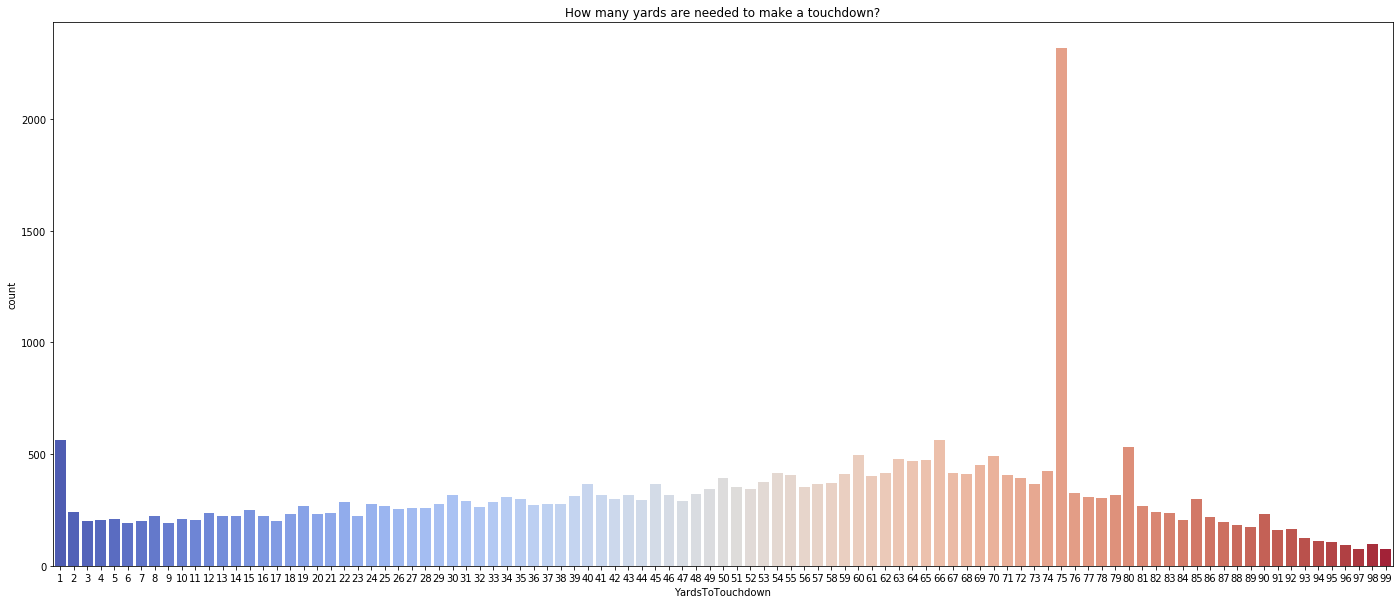

In [19]:
plt.figure(figsize=(24, 10))
snsj=sns.countplot(x=df['YardsToTouchdown'] ,palette="coolwarm")
plt.title('How many yards are needed to make a touchdown?')
plt.savefig("../reports/figures/data_YardsToTouchdown.png")

## Quarter variable

In [20]:
df['Quarter'].value_counts().sort_index()

1    7942
2    7441
3    7648
4    7779
5     197
Name: Quarter, dtype: int64

In [21]:
df['Quarter'].describe()

count    31007.000000
mean         2.511336
std          1.141080
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Quarter, dtype: float64

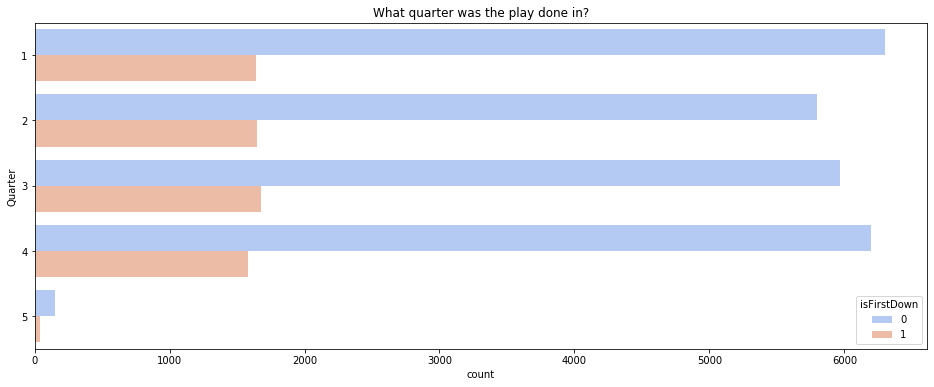

In [22]:
plt.figure(figsize=(16, 6))
snsj=sns.countplot(y=df['Quarter'], hue=df['isFirstDown'], palette="coolwarm")
plt.title('What quarter was the play done in?')
plt.savefig("../reports/figures/data_quarter.png")

## Down variable

In [23]:
df['Down'].value_counts().sort_index()

1    17925
2    10393
3     2421
4      268
Name: Down, dtype: int64

In [24]:
# Failed to make the first down, which down are you on
df[df['isFirstDown'] == 0]['Down'].value_counts().sort_index()

1    15731
2     7308
3     1261
4      115
Name: Down, dtype: int64

In [25]:
# Successfully made the first down, which down are you on
df[df['isFirstDown'] == 1]['Down'].value_counts().sort_index()

1    2194
2    3085
3    1160
4     153
Name: Down, dtype: int64

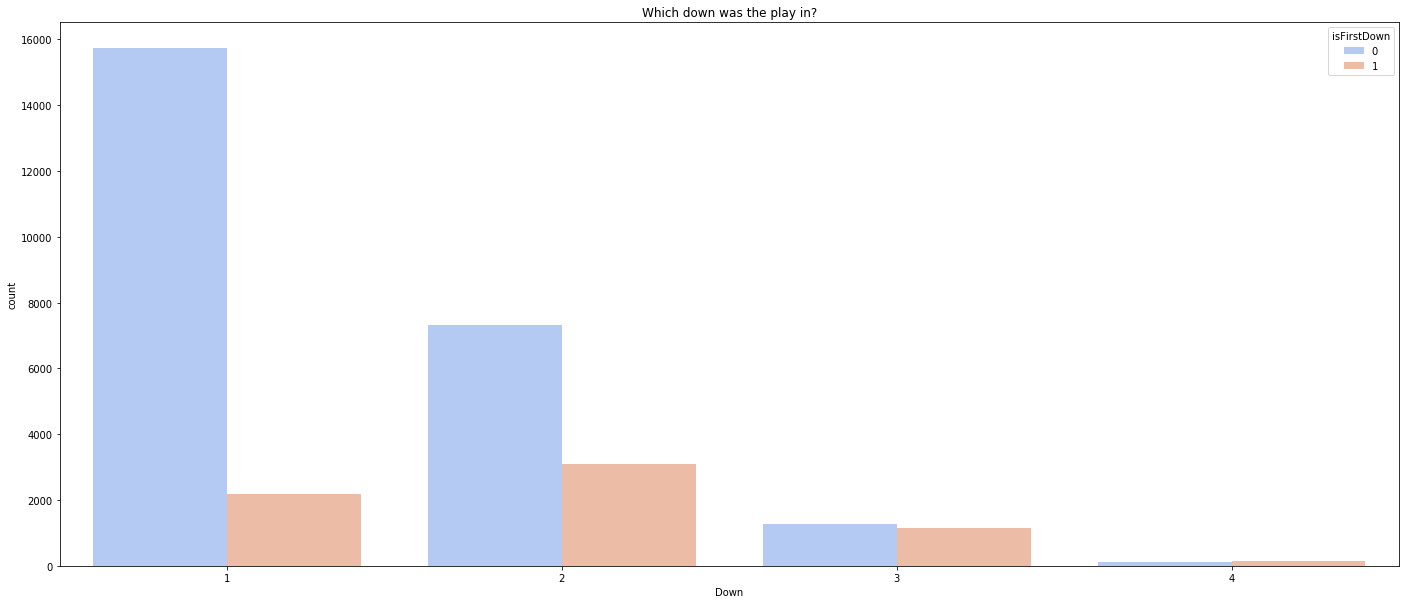

In [26]:
plt.figure(figsize=(24, 10))
snsj=sns.countplot(x=df['Down'], hue=df['isFirstDown'], palette="coolwarm")
plt.title('Which down was the play in?')
plt.savefig("../reports/figures/data_down.png")

In [30]:
df['DisplayName'].value_counts()

Ezekiel Elliott      751
Todd Gurley          667
Jordan Howard        637
Leonard Fournette    606
Carlos Hyde          581
                    ... 
Eli Manning            1
Kyle Williams          1
Paul Richardson        1
Rishard Matthews       1
Blake Bortles          1
Name: DisplayName, Length: 445, dtype: int64

In [39]:
df[df['isFirstDown'] == 1]['DisplayName'].value_counts().head(20)

Ezekiel Elliott        179
Todd Gurley            169
Jordan Howard          139
Derrick Henry          129
Melvin Gordon          128
Mark Ingram            127
Chris Carson           125
Joe Mixon              124
Marlon Mack            121
Alvin Kamara           118
Leonard Fournette      115
Carlos Hyde            112
Christian McCaffrey    112
Kareem Hunt            109
Frank Gore             102
LeSean McCoy            99
Le'Veon Bell            96
Aaron Jones             96
Dalvin Cook             94
Sony Michel             93
Name: DisplayName, dtype: int64

In [31]:
df['Position'].value_counts()

RB    28886
HB      923
WR      828
FB      209
QB       99
TE       48
CB       10
DT        2
DE        1
G         1
Name: Position, dtype: int64